# Лабораторная работа №6. Численное дифференцирование и решение задачи Коши
## Бегунов Никита
## А-13б-20
### Вариант 41

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Задача 1
**Задание:** Дана формула численного дифференцирования $f'(x) = {{af(x) + bf(x+k1*h) + cf(x+k2*h) + df(x+k3*h)}\over{h}}$. Требуется исследовать поведение погрешностей при численном дифференцировании.  
$f'(x) = {{af(x) + bf(x+12h) + cf(x+14h) + df(x-7h)}\over{h}}$

1. Определить коэффициенты a, b, c, d так, чтобы формула имела максимальный порядок точности.  

$f(x+12h) = f(x) + 12hf'(x) + {144\over{2}}h^2f''(x) + {1728\over{6}}h^3f'''(x)$

$f(x+14h) = f(x) + 14hf'(x) + {196\over{2}}h^2f''(x) + {2744\over{6}}h^3f'''(x)$

$f(x-7h) = f(x) - 7hf'(x) + {49\over{2}}h^2f''(x) - {343\over{6}}h^3f'''(x)$

$r = f'(x)h - af(x) - bf(x+12h) - cf(x+14h) - df(x-7h) = f'(x)h - af(x) - b(f(x) + 12hf'(x) + {144\over{2}}h^2f''(x) + {1728\over{6}}h^3f'''(x)) - c(f(x) + 14hf'(x) + {196\over{2}}h^2f''(x) + {2744\over{6}}h^3f'''(x)) - d(f(x) - 7hf'(x) + {49\over{2}}h^2f''(x) - {343\over{6}}h^3f'''(x)) = f(x)(-a-b-c-d) + f'(x)h(1-12b-14c+7d) + f''(x)h^2(-{144\over2}b - {196\over2}c - {49\over2}d) + f'''(x)h^3(-{1728\over6}b - {2744\over6}c + {343\over6}d)$  

\begin{cases}
-a - b - c - d = 0 \\
1 - 12b - 14c + 7d = 0 \\
-{144\over2}b - {196\over2}c - {49\over2}d = 0 \\
-{1728\over6}b - {2744\over6}c + {343\over6}d = 0 \\
\end{cases}  

Получаем коэффициенты $a = -{1\over84}, b = {49\over228}, c = -{1\over7}, d = -{8\over133}$

2. Реализовать программно полученную формулу численного дифференцирования и формулу правой разностной производной.

In [2]:
def myDif(f, x, h):
    return (-1/84*f(x) + 49/228*f(x+12*h) - 1/7*f(x+14*h) - 8/133*f(x-7*h))/h

def rightDif(f, x, h):
    return (f(x+h) - f(x)) / h

3. В качестве тестовой функции для проверки корректности работы программы взять функцию из задачи 5.1. На отрезке [a, b] построить графики точной и производной и полученные по формулам численного дифференцирования, выбрав шаг h = 0.0001.

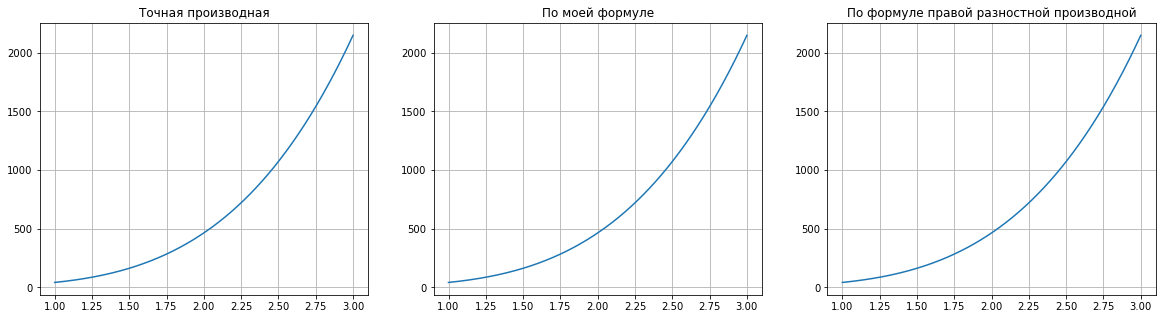

In [3]:
def f(x):
    return 4.8 + 1.5*x + 6.3*(x**2) - 2.7*(x**3) + 3.7*(x**4) + 4.4*(x**5)

def df(x):
    return 1.5 + 12.6*x - 8.1*(x**2) + 14.8*(x**3) + 22*(x**4)

a = 1
b = 3
h = 0.0001
x = np.arange(a, b, h)
fig, axs = plt.subplots(1, 3, figsize = (20,5))
axs[0].plot(x, df(x))
axs[0].set_title('Точная производная')
axs[0].grid()
axs[1].plot(x, myDif(f, x, h))
axs[1].set_title('По моей формуле')
axs[1].grid()
axs[2].plot(x, rightDif(f, x, h))
axs[2].set_title('По формуле правой разностной производной')
axs[2].grid()

4. Взять функцию из задачи 5.2. Выбрать фиксированную точку на отрезке [a, b] и вычислить значения производных по формулам мчисленного дифференцирования, уменьшая шаг дифференцирования $h_0 = 0.1$ последовательно в 10 раз: $h_k = h_0 * 10^{-k}, k = 0, 1, 2, ...$ Найти оптимальное значение шага дифференцирования для каждой формулы численного дифференцирования. По полученным данным построить графики погрешностей.  

$f(x) = \sqrt{x}*sin^2(3x), [a,b] = [0, 10]$

Оптимальное значение шага h для моей формулы:                   1e-05
Оптимальное значение шага h для правой разностной производной:  1.0000000000000002e-07


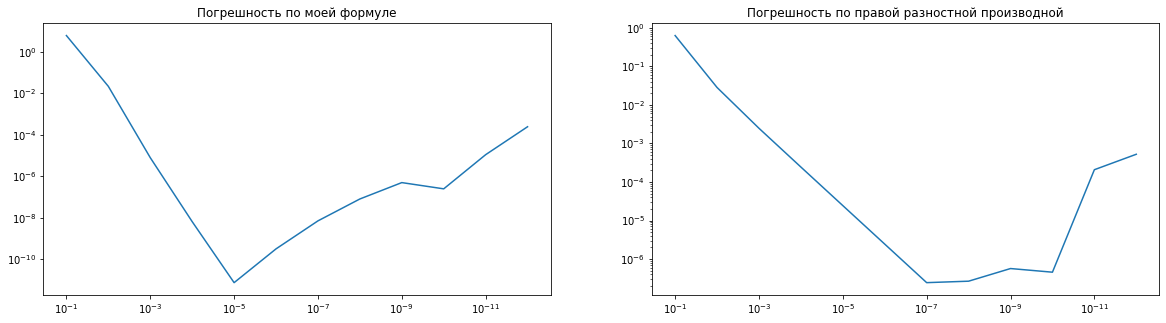

In [4]:
def f(x):
    return np.sqrt(x) * (np.sin(3*x))**2

def df(x):
    return (np.sin(3*x)**2 + 6*x*np.sin(6*x)) / (2*np.sqrt(x))

a = 0
b = 10
dot = (a + b) / 2
h = 0.1
hArr = []
rMyDif = []
rRightDif = []
exactValue = df(dot)
for i in range(12):
    rMyDif.append(np.abs(exactValue - myDif(f, dot, h)))
    rRightDif.append(np.abs(exactValue - rightDif(f, dot, h)))
    hArr.append(h)
    h /= 10
    
print('Оптимальное значение шага h для моей формулы:                  ', hArr[np.argmin(rMyDif)])
print('Оптимальное значение шага h для правой разностной производной: ', hArr[np.argmin(rRightDif)])

fig, axs = plt.subplots(1, 2, figsize = (20,5))
axs[0].loglog()
axs[0].set_title('Погрешность по моей формуле')
axs[0].invert_xaxis()
axs[0].plot(hArr, rMyDif)
axs[1].loglog()
axs[1].set_title('Погрешность по правой разностной производной')
axs[1].invert_xaxis()
axs[1].plot(hArr, rRightDif)

## Задача 2
**Задание:** Найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения (ОДУ) 1 порядка с точностью $\varepsilon = 10^{-6}$.  
$$
y' = r(t)y(t), t\in[t_0, T]\\
y(t_0) = y_0
$$

$r(t) = {t-2\over{2t}}, y_0 = -0.607, t_0 = -1, T = 1$

1. Найти аналитическое решение задачи.
$$
y' = {t-2\over{2t}}y \\
{dy\over{dt}} = {t-2\over{2t}}y \\
\int\limits {dy\over{y}} = \int\limits {t-2\over{2t}}dt \\
\int\limits {dy\over{y}} = \int\limits {t\over{2t}}dt - \int\limits {2\over{2t}}dt \\
\int\limits {dy\over{y}} = {1\over{2}}\int\limits dt - \int\limits {dt\over{t}} \\
ln y = {1\over{2}}t - ln t + ln C \\
y = e^{{1\over{2}}t - ln t + ln C} \\
y = C{e^{t\over{2}}\over{t}} \\
y(-1) = -0.607 \\
y(-1) = C{e^{-1\over{2}}\over{-1}} = -0.607 \\
C = {607\over{1000}}e^{1\over{2}} \\
y(t) = {607e^{t+1\over{2}}\over{1000t}} \\
$$

Так как полученное решение имеет разрыв в точке $0\in [t_0, T] = [-1, 1]$, я изменил условие на y(1) = 0.607, отрезок $[t_0, T] = [1, 3]$. В этом случае:  
$y^*(t) = {607e^{t-1\over{2}}\over{1000t}}$

2. Составить программу вычисления решения методом Эйлера с заданной точностью, используя правило Рунге. Найти решение задачи с точностью $\varepsilon = 10^{-6}$, число точек N и шаг, при котором точность достигается. Построить график решения.

In [5]:
def SolveEulerMethod(f, y_0, t_0, T, eps):
    def DoStep(h):
        n = math.ceil((T - t_0) / h)
        t = np.linspace(t_0, T, n+1)
        h = (T - t_0) / n
        y = [y_0]
        for i in range(1, len(t)):
            y.append(y[i-1] + h * f(t[i-1], y[i-1]))
        return h, t, y
    
    def GetError(y, y_new):
        r = []
        for i in range(len(y)):
            r.append(np.abs(y[i] - y_new[2*i]))
        return np.array(r)
    
    h = 0.1
    h, t, y = DoStep(h)
    h, t, y_new = DoStep(h/2)
    r = GetError(y, y_new)
    while r.max() > eps:
        y = y_new
        h, t, y_new = DoStep(h/2)
        r = GetError(y, y_new)
    return t, y_new, len(t), h

Число точек N для достижения точности:  655361
Шаг h для достожения точности:          3.0517578125e-06


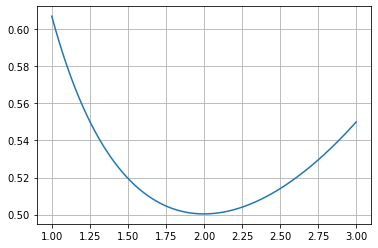

In [6]:
def f(t, y):
    return (t-2)*y/(2*t)

#y_0 = -0.607
#t_0 = -1
#T = 1
y_0 = 0.607
t_0 = 1
T = 3
eps = 10**(-6)

t, y, n, h = SolveEulerMethod(f, y_0, t_0, T, eps)
print('Число точек N для достижения точности: ', n)
print('Шаг h для достожения точности:         ', h)
plt.plot(t, y)
plt.grid()

3. Составить программу вычисления решения с заданной точностью методом индивидуального варианта. Найти решение задачи с заданной точностью, число точек N и шаг, при котором точность достигается. Построить график решения задачи.  
Метод решения: Усовершенствованный метод Эйлера

In [7]:
def SolveModEulerMethod(f, y_0, t_0, T, eps):
    def DoStep(h):
        n = math.ceil((T - t_0) / h)
        t = np.linspace(t_0, T, n+1)
        h = (T - t_0) / n
        y = [y_0]
        for i in range(1, len(t)):
            y.append(y[i-1] + h * f(t[i-1] + h/2, y[i-1] + h/2 * f(t[i-1], y[i-1])))
        return h, t, y
    
    def GetError(y, y_new):
        r = []
        for i in range(len(y)):
            r.append(np.abs(y[i] - y_new[2*i]) / 3)
        return np.array(r)
    
    h = 0.1
    h, t, y = DoStep(h)
    h, t, y_new = DoStep(h/2)
    r = GetError(y, y_new)
    while r.max() > eps:
        y = y_new
        h, t, y_new = DoStep(h/2)
        r = GetError(y, y_new)
    return t, y_new, len(t), h

Число точек N для достижения точности:  641
Шаг h для достожения точности:          0.003125


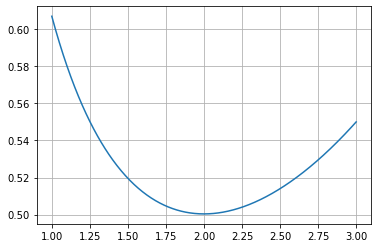

In [8]:
def f(t, y):
    return (t-2)*y/(2*t)

#y_0 = -0.607
#t_0 = -1
#T = 1
y_0 = 0.607
t_0 = 1
T = 3
eps = 10**(-6)

t, y, n, h = SolveModEulerMethod(f, y_0, t_0, T, eps)
print('Число точек N для достижения точности: ', n)
print('Шаг h для достожения точности:         ', h)
plt.plot(t, y)
plt.grid()

4. Сравнить полученные результаты.  
|Метод решения                   |Число точек N|     Шаг h      |
|:-------------------------------|:-----------:|:--------------:|
|Метод Эйлера                    |   655361    |3.0517578125e-06|
|Усовершенствованный метод Эйлера|     641     |    0.003125    |